<a href="https://colab.research.google.com/github/analysttammy/Housing/blob/main/NHanover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install streamlit

In [2]:
pip install lime

In [3]:
pip install dill

In [4]:
pip install pandas-profiling

In [5]:
#pip install plotly # Plotly is a pre-requisite before installing cufflinks
#pip install cufflinks

In [6]:

import os
import pandas as pd
import pandas_profiling
import cufflinks as cf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf


In [7]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)
%cd /gdrive/'MyDrive/Colab Notebooks/Cape Hackathon/'

Mounted at /gdrive
/gdrive/MyDrive/Colab Notebooks/Cape Hackathon


In [8]:
#df=pd.DataFrame(pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Cape Hackathon/eviction_label_export.xlsx"))
df = pd.DataFrame(pd.read_excel("eviction.xlsx"))
df

,GEOID,name,parent-location,year,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,undefined,evictions,eviction-filings,eviction-rate,eviction-filing-rate,evictions-per-day
0,37129,New Hanover County,North Carolina,2004,160307,13.05,35.31,631,40172,135600,29.0,78.88,16.84,2.04,0.36,0.83,0.05,0.87,0.12,0,1288,3864,4.55,13.66,3.52
1,37129,New Hanover County,North Carolina,2005,189463,8.90,38.53,820,47644,218300,32.8,78.34,15.46,3.25,0.34,1.16,0.02,1.14,0.29,0,1037,4312,3.53,14.69,2.84
2,37129,New Hanover County,North Carolina,2006,189463,8.90,38.53,820,47644,218300,32.8,78.34,15.46,3.25,0.34,1.16,0.02,1.14,0.29,0,969,4029,3.19,13.25,2.65
3,37129,New Hanover County,North Carolina,2007,189463,8.90,38.53,820,47644,218300,32.8,78.34,15.46,3.25,0.34,1.16,0.02,1.14,0.29,0,1764,4276,5.61,13.59,4.83
4,37129,New Hanover County,North Carolina,2008,189463,8.90,38.53,820,47644,218300,32.8,78.34,15.46,3.25,0.34,1.16,0.02,1.14,0.29,0,1892,4167,5.82,12.82,5.17
5,37129,New Hanover County,North Carolina,2009,189463,8.90,38.53,820,47644,218300,32.8,78.34,15.46,3.25,0.34,1.16,0.02,1.14,0.29,0,1915,3782,5.71,11.27,5.25
6,37129,New Hanover County,North Carolina,2010,202667,9.95,40.23,889,50420,222000,32.4,76.79,14.54,5.29,0.39,1.17,0.05,1.58,0.17,0,1727,3716,4.99,10.73,4.73
7,37129,New Hanover County,North Carolina,2011,213091,11.39,42.72,907,50088,214300,32.1,76.74,14.27,5.38,0.38,1.36,0.04,1.69,0.14,0,1219,3588,3.43,10.09,3.34
8,37129,New Hanover County,North Carolina,2012,213091,11.39,42.72,907,50088,214300,32.1,76.74,14.27,5.38,0.38,1.36,0.04,1.69,0.14,0,1244,3278,3.41,8.98,3.40
9,37129,New Hanover County,North Carolina,2013,213091,11.39,42.72,907,50088,214300,32.1,76.74,14.27,5.38,0.38,1.36,0.04,1.69,0.14,0,1436,3450,3.83,9.21,3.93


In [9]:
df.describe

<bound method NDFrame.describe of     GEOID                name  ... eviction-filing-rate  evictions-per-day
0   37129  New Hanover County  ...                13.66               3.52
1   37129  New Hanover County  ...                14.69               2.84
2   37129  New Hanover County  ...                13.25               2.65
3   37129  New Hanover County  ...                13.59               4.83
4   37129  New Hanover County  ...                12.82               5.17
5   37129  New Hanover County  ...                11.27               5.25
6   37129  New Hanover County  ...                10.73               4.73
7   37129  New Hanover County  ...                10.09               3.34
8   37129  New Hanover County  ...                 8.98               3.40
9   37129  New Hanover County  ...                 9.21               3.93
10  37129  New Hanover County  ...                 8.86               4.04
11  37129  New Hanover County  ...                 7.88           

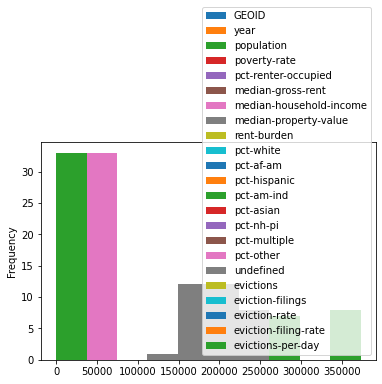

In [10]:
df.plot.hist()

In [11]:
print(df.columns)

Index(['GEOID', 'name', 'parent-location', 'year', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'undefined', 'evictions',
       'eviction-filings', 'eviction-rate', 'eviction-filing-rate',
       'evictions-per-day'],
      dtype='object')


In [12]:
for col_name in df.columns: 
    print(col_name)

GEOID
name
parent-location
year
population
poverty-rate
pct-renter-occupied
median-gross-rent
median-household-income
median-property-value
rent-burden
pct-white
pct-af-am
pct-hispanic
pct-am-ind
pct-asian
pct-nh-pi
pct-multiple
pct-other
undefined
evictions
eviction-filings
eviction-rate
eviction-filing-rate
evictions-per-day


In [13]:
print(df.columns.values.tolist())

['GEOID', 'name', 'parent-location', 'year', 'population', 'poverty-rate', 'pct-renter-occupied', 'median-gross-rent', 'median-household-income', 'median-property-value', 'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other', 'undefined', 'evictions', 'eviction-filings', 'eviction-rate', 'eviction-filing-rate', 'evictions-per-day']


In [14]:
sorted(df)

['GEOID',
 'eviction-filing-rate',
 'eviction-filings',
 'eviction-rate',
 'evictions',
 'evictions-per-day',
 'median-gross-rent',
 'median-household-income',
 'median-property-value',
 'name',
 'parent-location',
 'pct-af-am',
 'pct-am-ind',
 'pct-asian',
 'pct-hispanic',
 'pct-multiple',
 'pct-nh-pi',
 'pct-other',
 'pct-renter-occupied',
 'pct-white',
 'population',
 'poverty-rate',
 'rent-burden',
 'undefined',
 'year']

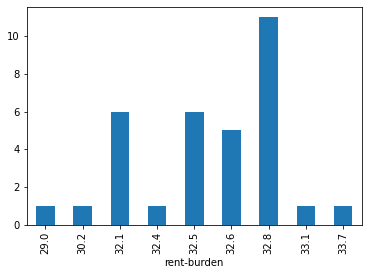

In [19]:
df.groupby('rent-burden')['eviction-filings'].nunique().plot(kind='bar')
plt.show()

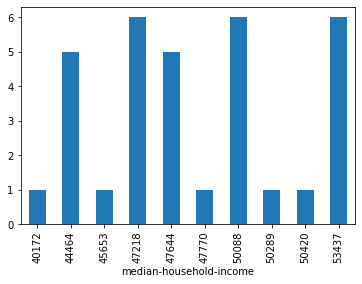

In [21]:
df.groupby('median-household-income')['eviction-filings'].nunique().plot(kind='bar')
plt.show()

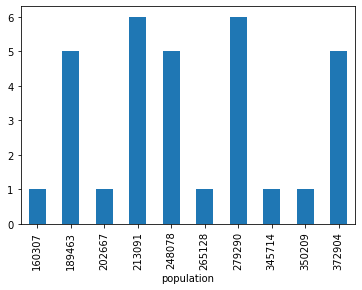

In [17]:
df.groupby('population')['eviction-rate'].nunique().plot(kind='bar')
plt.show()

poverty-rate

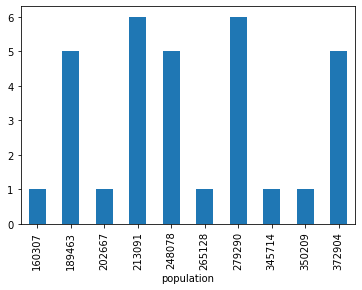

In [24]:
df.groupby('population')['eviction-rate'].nunique().plot(kind='bar')
plt.show()

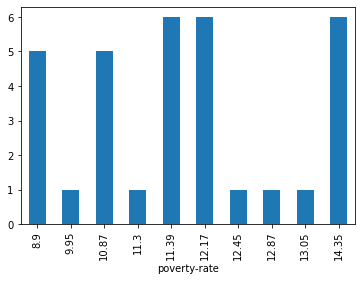

In [22]:
df.groupby('poverty-rate')['eviction-filings'].nunique().plot(kind='bar')
plt.show()

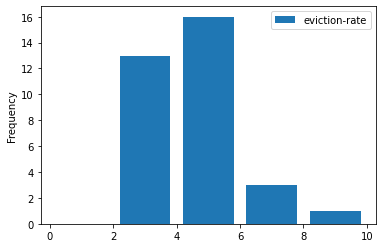

In [28]:
df[['eviction-rate']].plot(kind='hist',bins=[0,2,4,6,8,10],rwidth=0.8)
plt.show()

In [33]:
ax = plt.gca()

df.plot(kind='line', x='rent-burden',y='eviction-rate',ax=ax)
df.plot(kind='line', x='rent-burden, y='median-household-income', color='red', ax=ax)
plt.show()

SyntaxError: ignored